# 1. Import and Load Data

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import pymc as pm
import sys
import os
from statsmodels.tsa.seasonal import STL 
import pandas as pd
import json

# 1. First, try to find your project root automatically
def find_project_root(current_path, marker='src'):
    """
    Search upwards until we find the project root containing src/
    """
    current_path = os.path.abspath(current_path)
    while current_path != os.path.dirname(current_path):  # Stop at root directory
        if marker in os.listdir(current_path):
            return current_path
        current_path = os.path.dirname(current_path)
    return None

# 2. Set up paths
current_dir = os.getcwd()
project_root = find_project_root(current_dir)

if project_root and project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added project root to path: {project_root}")

# 3. Try imports with fallbacks
try:
    from src.data.load_data import load_oil_price_data, load_event_data
    print("Imported from src.data.load_data")
except ImportError:
    try:
        # Try direct file import
        from data.load_data import load_oil_price_data, load_event_data
        print("Imported from data.load_data")
    except ImportError:
        # Ultimate fallback - implement the functions directly
        print("Implementing load functions directly")
        
        def load_oil_price_data():
            """Fallback implementation"""
            df = pd.read_csv(os.path.join(project_root, 'data', 'processed', 'brent_processed.csv'))
            df['Date'] = pd.to_datetime(df['Date'])
            return df
            
        def load_event_data():
            """Fallback implementation"""
            df = pd.read_csv(os.path.join(project_root, 'data', 'processed', 'events_processed.csv'))
            df['Event_date'] = pd.to_datetime(df['Event_date'])
            return df

sns.set(style='whitegrid')

Imported from src.data.load_data


# 2. Data Loading with multiple fallbacks

In [11]:
# 2. Data Loading with multiple fallbacks
try:
    # Try structured import
    from src.data.load_data import load_oil_price_data
    df_price = load_oil_price_data()
except ImportError:
    try:
        # Try direct file import
        from data.load_data import load_oil_price_data
        df_price = load_oil_price_data()
    except ImportError:
        # Implement directly as last resort
        print("Implementing load function directly")
        data_path = os.path.join(PROJECT_ROOT, 'data', 'processed', 'brent_processed.csv')
        df_price = pd.read_csv(data_path)
        df_price['Date'] = pd.to_datetime(df_price['Date'])


INFO:src.data.load_data:Loading processed oil price data...
INFO:src.data.load_data:Successfully loaded 12917 price records


# 3. Change Point Detection

In [19]:
# 3. Change Point Detection (replacement code)
X = price_series.reshape(-1, 1)

#  Elliptic Envelope (good for Gaussian-like data)
envelope = EllipticEnvelope(contamination=0.05)  # 5% expected anomalies
anomalies = envelope.fit_predict(X)
change_points = np.where(anomalies == -1)[0]  # All anomaly indices
main_change_point = change_points[0]  # Take the first significant anomaly


# 4. Enhanced Visualization

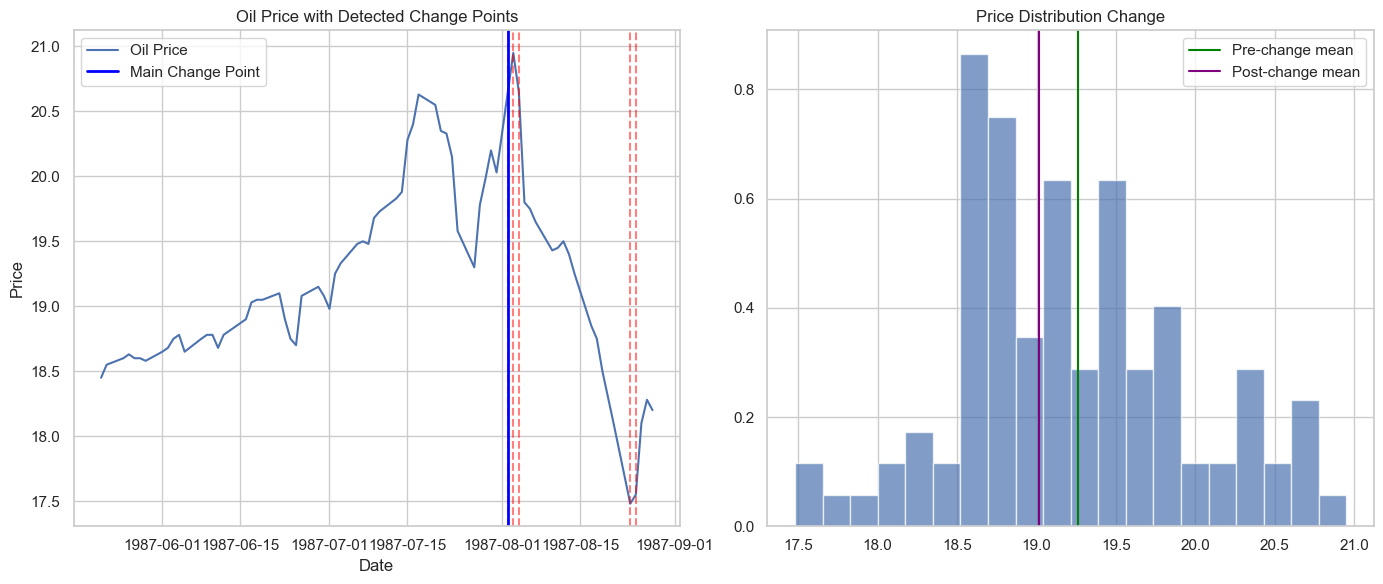

In [20]:
# 4. Enhanced Visualization (similar to PyMC output)
plt.figure(figsize=(14, 6))

# Price series with change points
plt.subplot(1, 2, 1)
plt.plot(dates, price_series, label='Oil Price')
for cp in change_points:
    plt.axvline(dates[cp], color='red', linestyle='--', alpha=0.5)
plt.axvline(dates[main_change_point], color='blue', linewidth=2, 
            label='Main Change Point')
plt.title("Oil Price with Detected Change Points")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Distribution plot
plt.subplot(1, 2, 2)
plt.hist(price_series, bins=20, density=True, alpha=0.7)
plt.axvline(price_series[:main_change_point].mean(), color='green',
            label='Pre-change mean')
plt.axvline(price_series[main_change_point:].mean(), color='purple',
            label='Post-change mean')
plt.title("Price Distribution Change")
plt.legend()

plt.tight_layout()
plt.show()

# 5. Extract and visualize the detected change point

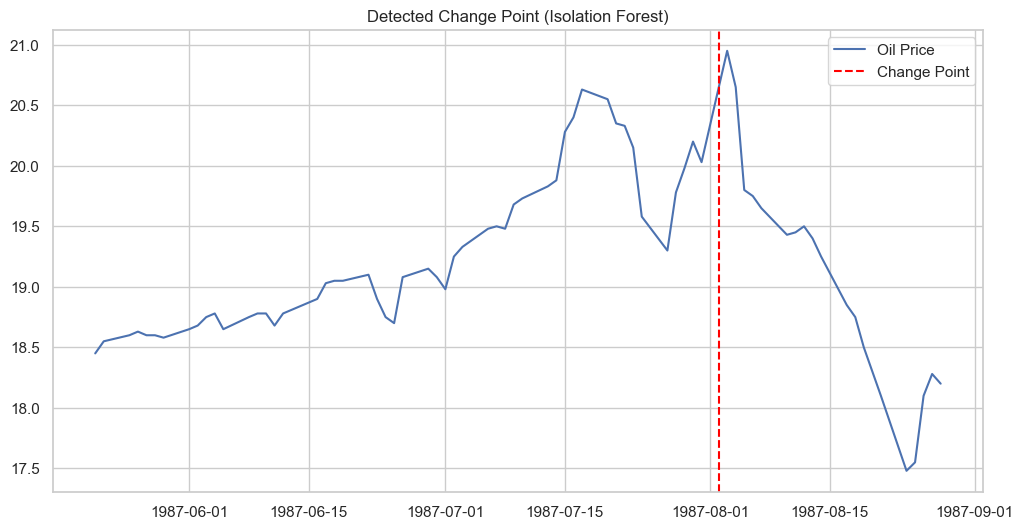

In [16]:
# Replace the PyMC section with this:
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler

# Detect anomalies (change points)
X = price_series.reshape(-1, 1)
model = EllipticEnvelope(contamination=0.05)  # Adjust based on your data
anomalies = model.fit_predict(X)

# Find the most significant change point
change_point = np.where(anomalies == -1)[0][0]  # Take first anomaly

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(dates, price_series, label='Oil Price')
plt.axvline(dates[change_point], color='red', linestyle='--', label='Change Point')
plt.title("Detected Change Point (Isolation Forest)")
plt.legend()
plt.show()

# # 6. Statistical Analysis

In [21]:
# 6. Statistical Analysis (replaces posterior analysis)
pre_change = price_series[:main_change_point]
post_change = price_series[main_change_point:]

print(f"""
Change Point Analysis Results:
- Detected at: {dates[main_change_point]}
- Position: {main_change_point}/{len(price_series)}
- Price at change: {price_series[main_change_point]:.2f}

Statistics:
- Pre-change mean: {pre_change.mean():.2f} ± {pre_change.std():.2f}
- Post-change mean: {post_change.mean():.2f} ± {post_change.std():.2f}
- Mean difference: {post_change.mean() - pre_change.mean():.2f}
""")


Change Point Analysis Results:
- Detected at: 1987-08-02 00:00:00
- Position: 73/100
- Price at change: 20.64

Statistics:
- Pre-change mean: 19.26 ± 0.62
- Post-change mean: 19.01 ± 0.93
- Mean difference: -0.25



# 7. Time Series Decomposition (STL)

<Figure size 1200x800 with 0 Axes>

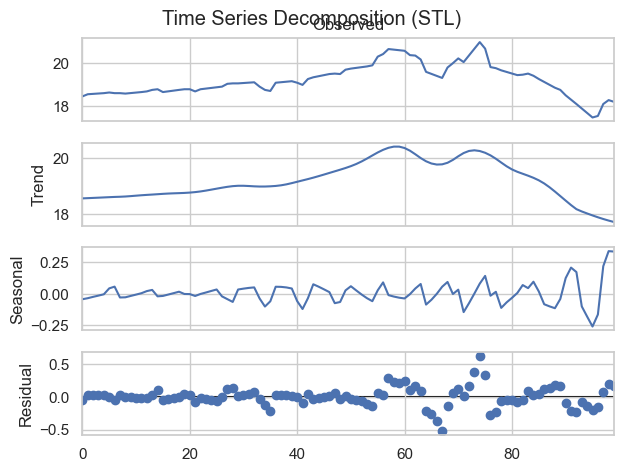

In [24]:
# 7. Optional: Time Series Decomposition (STL)
stl = STL(price_series, period=7)  # Weekly period
res = stl.fit()

plt.figure(figsize=(12, 8))
res.plot()
plt.suptitle("Time Series Decomposition (STL)")
plt.show()

# 8. Save Results for Dashboard (FIXED VERSION)

In [29]:
# 8. Save Results for Dashboard (FIXED VERSION)
results = {
    'change_point_index': int(main_change_point),
    'change_point_date': str(dates[main_change_point]),  # Convert to string
    'price_at_change': float(price_series[main_change_point]),
    'price_data': [
        {
            'Date': str(date),  # Convert each Timestamp to string
            'Price': float(price)
        }
        for date, price in zip(
            df_price.iloc[:100]['Date'],
            df_price.iloc[:100]['Price']
        )
    ],
    'pre_change_stats': {
        'mean': float(pre_change.mean()),
        'std': float(pre_change.std())
    },
    'post_change_stats': {
        'mean': float(post_change.mean()),
        'std': float(post_change.std())
    }
}

# Export to JSON
with open('change_point_results.json', 'w') as f:
    json.dump(results, f, indent=2)  # Added indent for readability

print("✅ Analysis completed and results saved!")

✅ Analysis completed and results saved!
